# Заняття 9

## Мета:
Розробити та налаштувати GAN для задачі відновлення зображень (наприклад, збільшення роздільної здатності, відновлення пошкоджених зображень), а також оцінити ефективність отриманої моделі.

---

## Кроки для виконання завдання:

### 1. Встановлення середовища:
- Встановіть необхідні бібліотеки: TensorFlow або PyTorch, numpy, matplotlib, OpenCV (для обробки зображень).
- Підготуйте обчислювальне середовище із GPU для швидшого навчання, якщо можливо.

---

### 2. Вибір та підготовка набору даних:
- Виберіть набір даних для відновлення зображень, наприклад, CelebA (для облич) або інший датасет зображень.
- Підготуйте навчальні приклади: створіть зменшені або пошкоджені версії зображень для тренування GAN (наприклад, зменшення роздільної здатності, розмиття або додавання шуму).

---

### 3. Створення архітектури GAN для відновлення зображень:
#### Генератор:
- Побудуйте генератор, що прийматиме зображення з низькою роздільною здатністю (або пошкоджене) та відновлюватиме його до високоякісної версії.
  - Використайте згорткові шари (Conv2DTranspose) та шари Batch Normalization для кращої стабільності.
  - Додайте функцію активації ReLU або LeakyReLU в прихованих шарах, і tanh для вихідного шару.

#### Дискримінатор:
- Побудуйте дискримінатор для розпізнавання відновлених (штучних) зображень від реальних.
  - Використайте згорткові шари з функціями активації LeakyReLU та нормалізацію пакетів (Batch Normalization).
  - Завершіть дискримінатор функцією активації sigmoid для класифікації (реальне/згенероване).

---

### 4. Налаштування функцій втрат та оптимізаторів:
- Використайте binary cross-entropy як функцію втрат для дискримінатора.
- Для генератора використайте mean squared error або L1 втрати для відновлення зображення та повний adversarial loss (для конкуренції з дискримінатором).
- Налаштуйте оптимізатори (наприклад, Adam) з відповідними коефіцієнтами навчання (зазвичай, менший коефіцієнт для дискримінатора).

---

### 5. Навчання GAN:
- **Крок 1:** Навчіть дискримінатор окремо, використовуючи реальні та згенеровані зображення.
- **Крок 2:** Навчіть генератор для покращення якості зображень і обману дискримінатора.
- Повторюйте цей процес навчання протягом декількох епох, поступово збільшуючи якість згенерованих зображень.

---

### 6. Оцінка ефективності:
- Використайте метрики, такі як PSNR (Peak Signal-to-Noise Ratio) та SSIM (Structural Similarity Index) для оцінки якості відновлених зображень.
- Проведіть візуальне порівняння між відновленими зображеннями та оригіналами для оцінки точності відновлення.

---

## Мінімальні вимоги:
- Реалізувати GAN для відновлення зображень та провести базову оцінку ефективності за допомогою метрик PSNR та SSIM.

---

## Додаткові рекомендації:
- Спробуйте інші архітектури GAN, такі як SRGAN (Super-Resolution GAN) для покращення якості відновлення зображень.

---

## Формат виконання:
- `.ipynb` блокнот із кодом та візуалізацією, або ж код в `.py` з прикріпленими зображеннями результатів на гітхабі.


## Виконання завдання

### 1. Встановлення середовища

#### **1.1. Встановлення необхідних бібліотек**

In [1]:
!nvidia-smi

Mon Dec 23 23:12:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000               Off | 00000000:C1:00.0 Off |                  Off |
| 30%   28C    P8              21W / 230W |     10MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
%pip install --upgrade pip
%pip install tensorflow --upgrade
%pip install tensorflow_addons numpy matplotlib skimage opencv-python


Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 10.5 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 13.0 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 23.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.8 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extension

#### **1.2. Підтримка GPU для прискорення**

1. **Перевірте доступність GPU:**
   - Для Mac із M1/M2:
     TensorFlow автоматично використовуватиме **Metal Performance Shaders (MPS)**.
     Перевірка:

In [5]:
import tensorflow as tf
print("Is MPS available?", tf.config.list_physical_devices())


2024-12-23 23:15:39.907340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Is MPS available? [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-12-23 23:15:41.609551: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-23 23:15:41.615495: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-23 23:15:41.615823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

- Для CUDA (NVIDIA GPU):
  Переконайтеся, що у вас встановлені:
  - NVIDIA CUDA Toolkit: [Завантажити](https://developer.nvidia.com/cuda-downloads)
  - cuDNN бібліотека: [Завантажити](https://developer.nvidia.com/cudnn)
     


In [6]:
%pip install nvidia-pyindex nvidia-cuda-runtime-cu11

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 14.1 MB/s eta 0:00:00
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8418 sha256=9d00c703ac2e028dd6695c62621b000e2eaa8e17cd9bda79494d71086af138cf
  Stored in directory: /home/.cache/pip/wheels/e0/c2/fb/5cf4e1cfaf28007238362cb746fb38fc2dd76348331a748d54
Successfully built nvidia-pyindex
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
print("Is CUDA available?", tf.config.list_physical_devices('GPU'))

Is CUDA available? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### **1.3. Перевірка середовища**

1. Створіть тестовий Python-скрипт або відкрийте Jupyter Notebook:

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())

TensorFlow version: 2.13.1
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2. Переконайтеся, що обчислювальне середовище працює коректно:
   - GPU: Очікуйте побачити доступність `GPU` або `MPS`.
   - CPU: Якщо GPU не доступний, працюватиме на CPU.


### 2. Вибір та підготовка набору даних:
- Виберіть набір даних для відновлення зображень, наприклад, CelebA (для облич) або інший датасет зображень.
- Підготуйте навчальні приклади: створіть зменшені або пошкоджені версії зображень для тренування GAN (наприклад, зменшення роздільної здатності, розмиття або додавання шуму).

170498071/170498071 [==============================] - 15s 0us/step


2024-12-23 23:17:03.964631: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-23 23:17:03.965059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-23 23:17:03.965384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

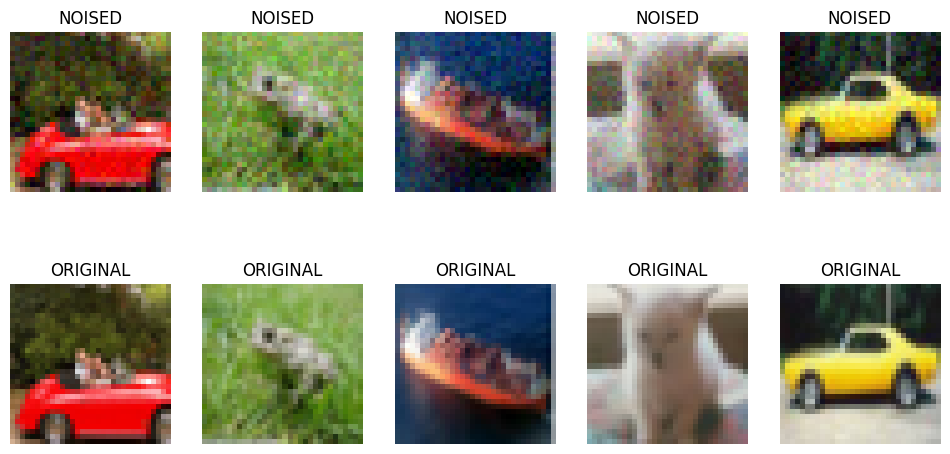

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Завантаження CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()

# Нормалізація до [-1, 1]
x_train = (x_train.astype("float32") / 127.5) - 1
x_test = (x_test.astype("float32") / 127.5) - 1


# Зменшення роздільної здатності
def downsample_images(images, scale=2):
    original_shape = tf.shape(images)[1:3]
    downscaled = tf.image.resize(images, original_shape // scale, method="bilinear")
    upscaled = tf.image.resize(downscaled, original_shape, method="bilinear")
    return upscaled


# Додавання шуму
def add_noise(images, noise_factor=0.1):
    noise = tf.random.normal(shape=tf.shape(images), mean=0.0, stddev=noise_factor)
    noisy_images = images + noise
    return tf.clip_by_value(noisy_images, -1.0, 1.0)


# Підготовка датасету
batch_size = 64


def prepare_dataset(images, mode="downsample", scale=2, noise_factor=0.1):
    def augment(image):
        if mode == "downsample":
            return downsample_images(image, scale)
        elif mode == "noise":
            return add_noise(image, noise_factor)
        else:
            raise ValueError("Unsupported mode. Use 'downsample', 'noise', or 'blur'.")

    dataset = tf.data.Dataset.from_tensor_slices(images)
    dataset = dataset.map(
        lambda img: (augment(img), img)
    )  # Вхід: пошкоджене, Вихід: оригінал
    dataset = dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset


# Використання режиму "downsample"
train_dataset = prepare_dataset(x_train, mode="noise")
test_dataset = prepare_dataset(x_test, mode="noise")

# Перевірка та візуалізація
for batch in train_dataset.take(1):
    inputs, targets = batch
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))

    for i, ax in enumerate(axes[0]):
        ax.imshow((inputs[i].numpy() + 1) / 2)  # Повернення до [0, 1]
        ax.axis("off")
        ax.set_title("NOISED")

    for i, ax in enumerate(axes[1]):
        ax.imshow((targets[i].numpy() + 1) / 2)  # Повернення до [0, 1]
        ax.axis("off")
        ax.set_title("ORIGINAL")

    plt.show()


### 3. Створення архітектури GAN для відновлення зображень:
#### Тренер



In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr


class Trainer:
    def __init__(
        self,
        generator,
        discriminator,
        batch_size=64,
        optimizer_g=tf.keras.optimizers.Adam,
        optimizer_d=tf.keras.optimizers.Adam,
        optimizer_g_par={"learning_rate": 0.0002, "beta_1": 0.5},
        optimizer_d_par={"learning_rate": 0.0001, "beta_1": 0.5},
        z_dim=100,
    ):
        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = batch_size
        self.z_dim = z_dim
        self.optimizer_g = optimizer_g(**optimizer_g_par)
        self.optimizer_d = optimizer_d(**optimizer_d_par)
        self.bce_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.l1_loss = tf.keras.losses.MeanAbsoluteError()

        # Історія для відстеження прогресу
        self.history = {
            "d_loss": [],
            "g_loss": [],
        }

    def train_step(self, data):
        # Обробляємо вхідні дані
        if isinstance(data, tuple):
            real_images = data[0]
        else:
            real_images = data

        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal([batch_size, 1, 1, self.z_dim])

        # Дискримінатор
        with tf.GradientTape() as tape_d:
            fake_images = self.generator(noise, training=True)
            real_output = self.discriminator(real_images, training=True)
            fake_output = self.discriminator(fake_images, training=True)

            real_labels = tf.ones_like(real_output)
            fake_labels = tf.zeros_like(fake_output)

            d_loss_real = self.bce_loss(real_labels, real_output)
            d_loss_fake = self.bce_loss(fake_labels, fake_output)
            d_loss = d_loss_real + d_loss_fake

        grads_d = tape_d.gradient(d_loss, self.discriminator.trainable_variables)
        self.optimizer_d.apply_gradients(
            zip(grads_d, self.discriminator.trainable_variables)
        )

        # Генератор
        with tf.GradientTape() as tape_g:
            fake_images = self.generator(noise, training=True)
            fake_output = self.discriminator(fake_images, training=True)

            adv_loss = self.bce_loss(tf.ones_like(fake_output), fake_output)

            target_height = tf.shape(real_images)[1]
            target_width = tf.shape(real_images)[2]
            resized_fake_images = tf.image.resize(
                fake_images, [target_height, target_width], method="bilinear"
            )

            real_images = tf.cast(real_images, dtype=tf.float32)
            resized_fake_images = tf.cast(resized_fake_images, dtype=tf.float32)

            rec_loss = tf.reduce_mean(tf.abs(real_images - resized_fake_images))
            g_loss = adv_loss + 100 * rec_loss

        grads_g = tape_g.gradient(g_loss, self.generator.trainable_variables)
        self.optimizer_g.apply_gradients(
            zip(grads_g, self.generator.trainable_variables)
        )

        return d_loss, g_loss

    def train(self, dataset, epochs=5, print_interval=100, sample_interval=500):
        """
        Навчання GAN з візуалізацією прогресу.
        """
        for epoch in range(epochs):
            print(f"\nEpoch {epoch+1}/{epochs}")

            # Прогрес-бар для епохи
            for step, real_images in enumerate(dataset):
                d_loss, g_loss = self.train_step(real_images)

                # Зберігаємо історію
                self.history["d_loss"].append(float(d_loss))
                self.history["g_loss"].append(float(g_loss))

                if step % print_interval == 0:
                    print(f"Step {step}: D={float(d_loss):.3f}, G={float(g_loss):.3f}")

                # Генеруємо приклади під час навчання
                if step % sample_interval == 0:
                    self.generate_and_plot_samples(
                        4, title=f"Epoch {epoch+1}, Step {step}"
                    )

            # Візуалізація в кінці епохи
            self.plot_losses()
            self.generate_and_plot_samples(16, title=f"End of Epoch {epoch+1}")
            plt.show()

    def generate_and_plot_samples(self, num_samples=16, title=None):
        """
        Генерація та візуалізація зображень з поточного стану генератора.
        """
        rows = int(np.sqrt(num_samples))
        noise = tf.random.normal([num_samples, 1, 1, self.z_dim])
        fake_images = self.generator(noise, training=False)
        fake_images = (fake_images + 1) / 2  # Нормалізація до [0, 1]

        plt.figure(figsize=(8, 8))
        if title:
            plt.suptitle(title)

        for i in range(num_samples):
            plt.subplot(rows, rows, i + 1)
            plt.imshow(fake_images[i].numpy())
            plt.axis("off")
        plt.tight_layout()
        plt.show()

    def plot_losses(self):
        """
        Візуалізація графіків втрат.
        """
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.history["d_loss"], label="D Loss")
        plt.title("Discriminator Loss")
        plt.xlabel("Step")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.history["g_loss"], label="G Loss")
        plt.title("Generator Loss")
        plt.xlabel("Step")
        plt.ylabel("Loss")
        plt.legend()

        plt.tight_layout()
        plt.show()

    def evaluate_images(self, real_images, restored_images):
        """
        Оцінка якості відновлених зображень за допомогою PSNR та SSIM.
        """
        psnr_values = []
        ssim_values = []

        for real, restored in zip(real_images, restored_images):
            real = (real + 1) / 2  # Масштабування до [0, 1]
            restored = (restored + 1) / 2  # Масштабування до [0, 1]

            real_np = real.numpy()
            restored_np = restored.numpy()

            psnr_value = psnr(real_np, restored_np, data_range=1.0)
            ssim_value = ssim(real_np, restored_np, multichannel=True, data_range=1.0)

            psnr_values.append(psnr_value)
            ssim_values.append(ssim_value)

        avg_psnr = np.mean(psnr_values)
        avg_ssim = np.mean(ssim_values)

        print(f"Average PSNR: {avg_psnr:.2f}")
        print(f"Average SSIM: {avg_ssim:.3f}")

        return avg_psnr, avg_ssim



#### Генератор:
- Побудуйте генератор, що прийматиме зображення з низькою роздільною здатністю (або пошкоджене) та відновлюватиме його до високоякісної версії.
  - Використайте згорткові шари (Conv2DTranspose) та шари Batch Normalization для кращої стабільності.
  - Додайте функцію активації ReLU або LeakyReLU в прихованих шарах, і tanh для вихідного шару.


In [11]:
import tensorflow as tf
from tensorflow.keras import layers


class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = tf.keras.Sequential(
            [
                layers.Input(shape=(1, 1, 100)),  # Визначаємо вхідний шар
                # Layer 1: Згортковий шар для початкової обробки
                layers.Conv2DTranspose(
                    128, (4, 4), strides=(1, 1), padding="valid", use_bias=False
                ),
                layers.BatchNormalization(),
                layers.ReLU(),
                # Layer 2: Згортковий шар
                layers.Conv2DTranspose(
                    64, (4, 4), strides=(2, 2), padding="same", use_bias=False
                ),
                layers.BatchNormalization(),
                layers.ReLU(),
                # Layer 3: Згортковий шар
                layers.Conv2DTranspose(
                    32, (4, 4), strides=(2, 2), padding="same", use_bias=False
                ),
                layers.BatchNormalization(),
                layers.ReLU(),
                # Layer 4: Згортковий шар
                layers.Conv2DTranspose(
                    3,
                    (4, 4),
                    strides=(2, 2),
                    padding="same",
                    use_bias=False,
                    activation="tanh",
                ),
            ]
        )

    def call(self, inputs, training=False):
        return self.model(inputs)



#### Дискримінатор:
- Побудуйте дискримінатор для розпізнавання відновлених (штучних) зображень від реальних.
  - Використайте згорткові шари з функціями активації LeakyReLU та нормалізацію пакетів (Batch Normalization).
  - Завершіть дискримінатор функцією активації sigmoid для класифікації (реальне/згенероване).


In [12]:
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = tf.keras.Sequential(
            [
                layers.Input(shape=(32, 32, 3)),  # Вхідний розмір зображення
                # Layer 1: Згортковий шар
                layers.Conv2D(
                    64, (4, 4), strides=(2, 2), padding="same", use_bias=False
                ),
                layers.LeakyReLU(alpha=0.2),
                # Layer 2: Згортковий шар
                layers.Conv2D(
                    128, (4, 4), strides=(2, 2), padding="same", use_bias=False
                ),
                layers.BatchNormalization(),
                layers.LeakyReLU(alpha=0.2),
                # Layer 3: Згортковий шар
                layers.Conv2D(
                    256, (4, 4), strides=(2, 2), padding="same", use_bias=False
                ),
                layers.BatchNormalization(),
                layers.LeakyReLU(alpha=0.2),
                # Вихідний шар
                layers.Flatten(),
                layers.Dense(
                    1, activation="sigmoid"
                ),  # Класифікація реальне/згенероване
            ]
        )

    def call(self, inputs, training=False):
        return self.model(inputs)

#### Перевірка

In [13]:
generator = Generator()
discriminator = Discriminator()

noise = tf.random.normal([1, 1, 1, 100])  # Приклад шуму
fake_image = generator(noise, training=False)

prediction = discriminator(fake_image, training=False)
print("Fake image shape:", fake_image.shape)
print("Prediction:", prediction)


2024-12-23 23:17:21.548675: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-23 23:17:21.557972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8700


Fake image shape: (1, 32, 32, 3)
Prediction: tf.Tensor([[0.50009555]], shape=(1, 1), dtype=float32)


### 5. Навчання GAN:
- **Крок 1:** Навчіть дискримінатор окремо, використовуючи реальні та згенеровані зображення.
- **Крок 2:** Навчіть генератор для покращення якості зображень і обману дискримінатора.
- Повторюйте цей процес навчання протягом декількох епох, поступово збільшуючи якість згенерованих зображень.



Epoch 1/5


/usr/local/lib/python3.8/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-12-23 23:17:29.282559: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x9b56840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-23 23:17:29.282613: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2024-12-23 23:17:29.286713: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-23 23:17:29.392413: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step 0: D=1.839, G=53.003


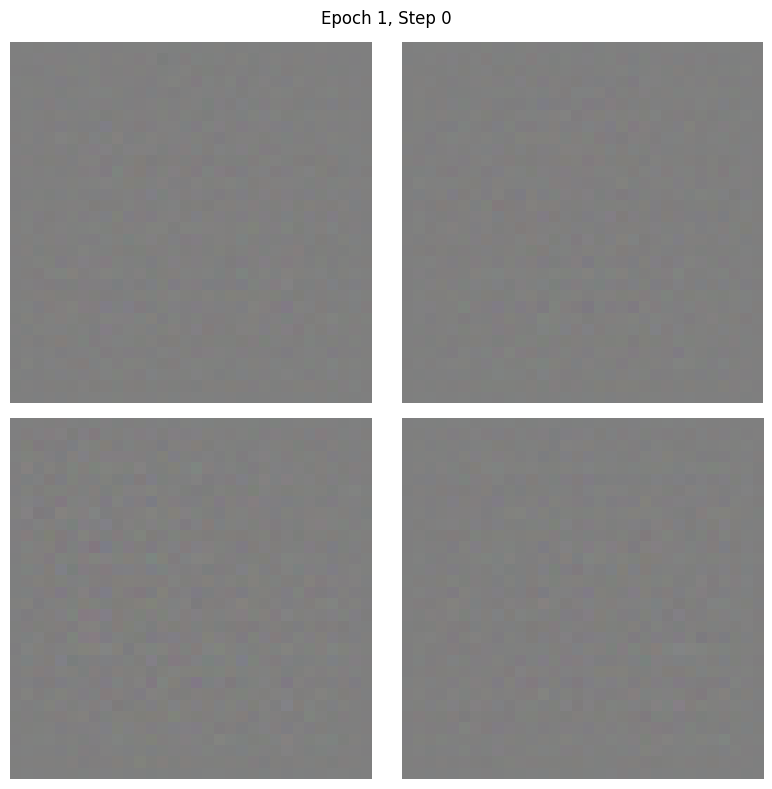

Step 100: D=0.093, G=50.598
Step 200: D=0.222, G=48.031
Step 300: D=0.050, G=52.545
Step 400: D=0.088, G=52.425
Step 500: D=0.201, G=53.001


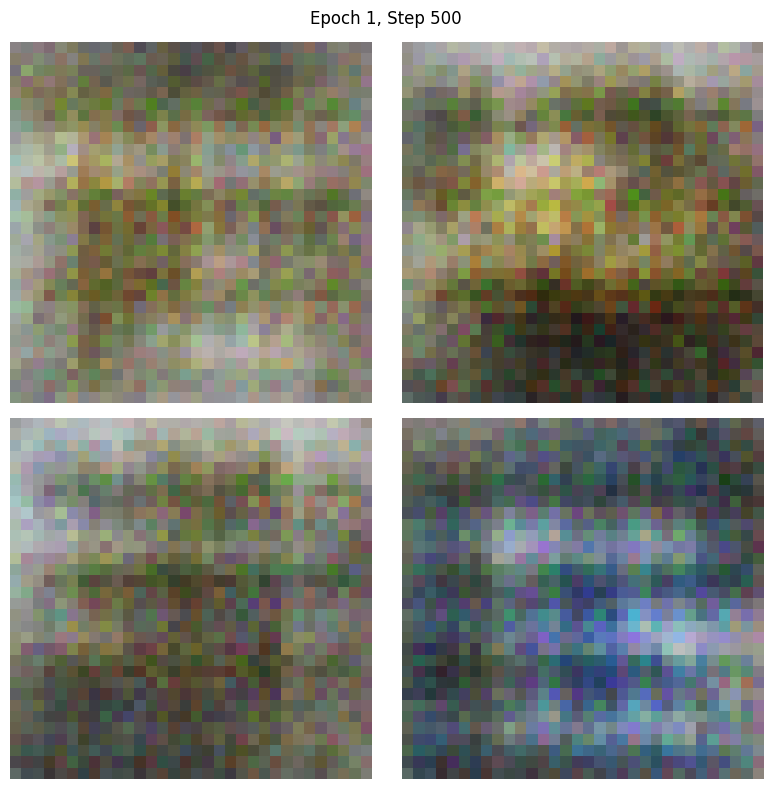

Step 600: D=0.086, G=54.441
Step 700: D=0.132, G=53.337


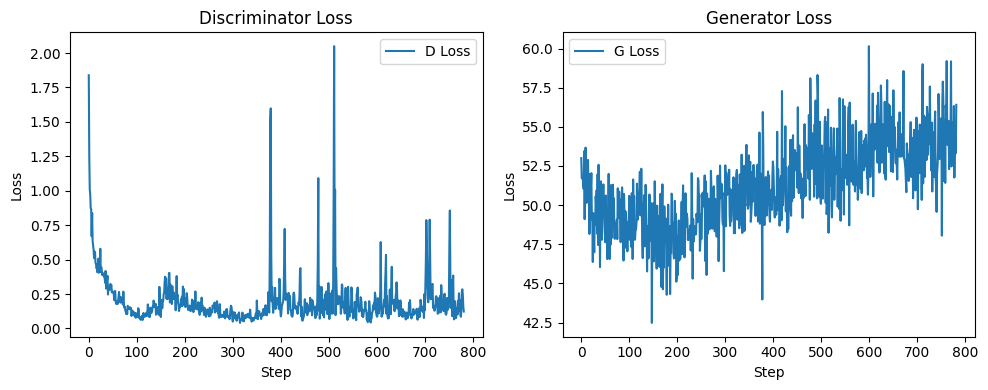

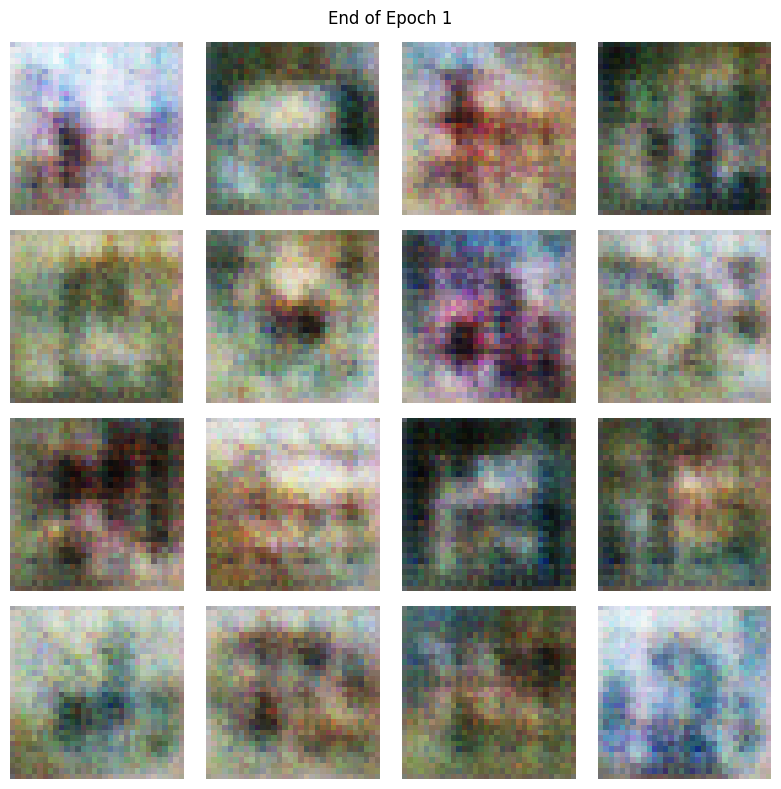


Epoch 2/5
Step 0: D=0.270, G=50.635


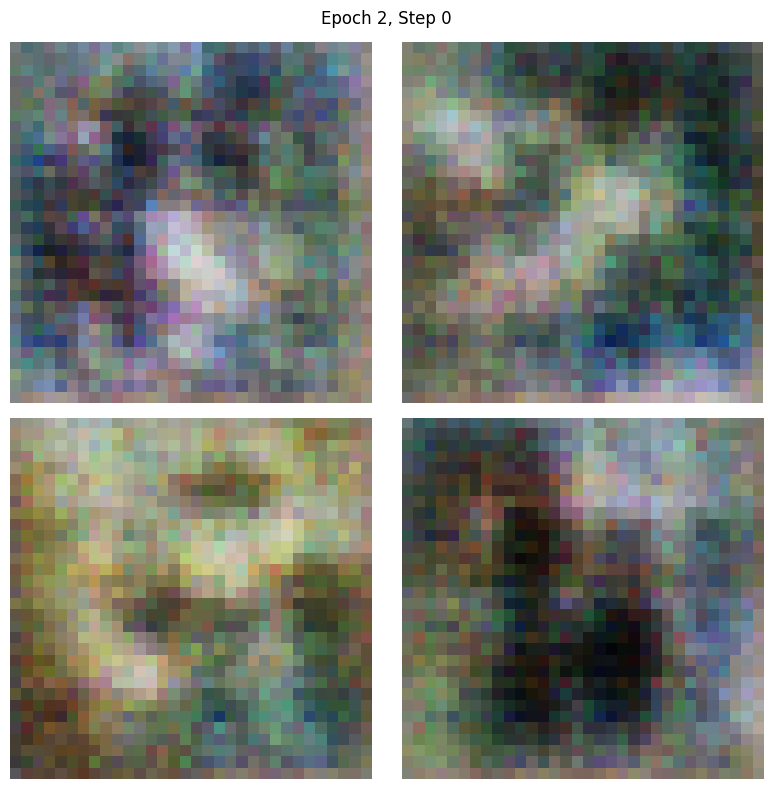

Step 100: D=0.816, G=52.448
Step 200: D=0.218, G=54.579
Step 300: D=0.055, G=59.052
Step 400: D=0.340, G=52.890
Step 500: D=0.145, G=57.631


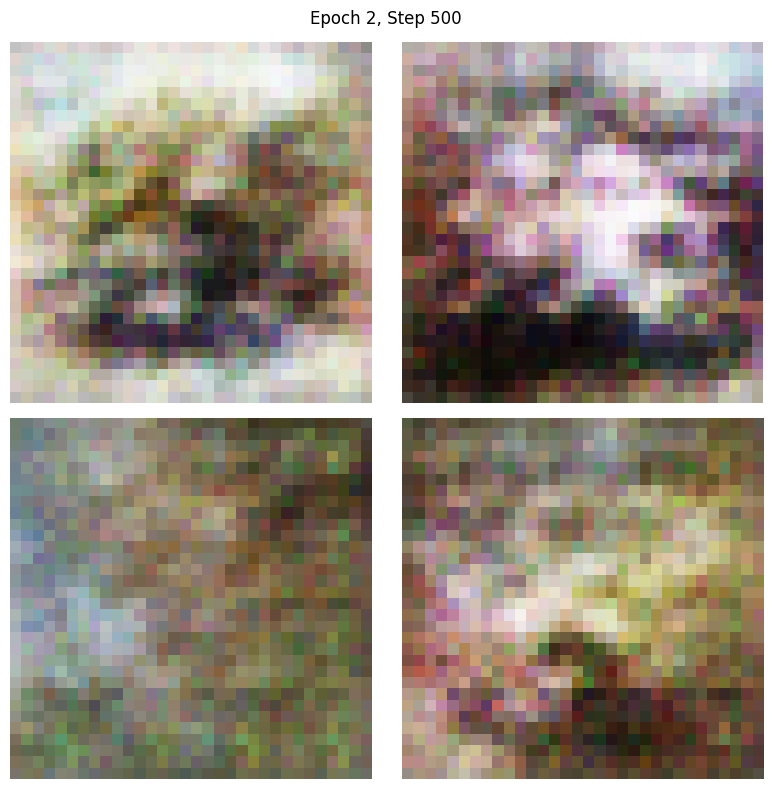

Step 600: D=0.198, G=56.838
Step 700: D=0.122, G=58.165


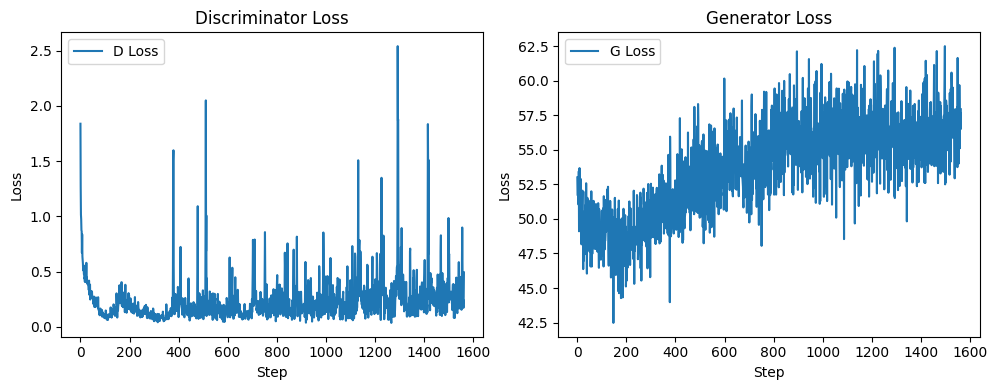

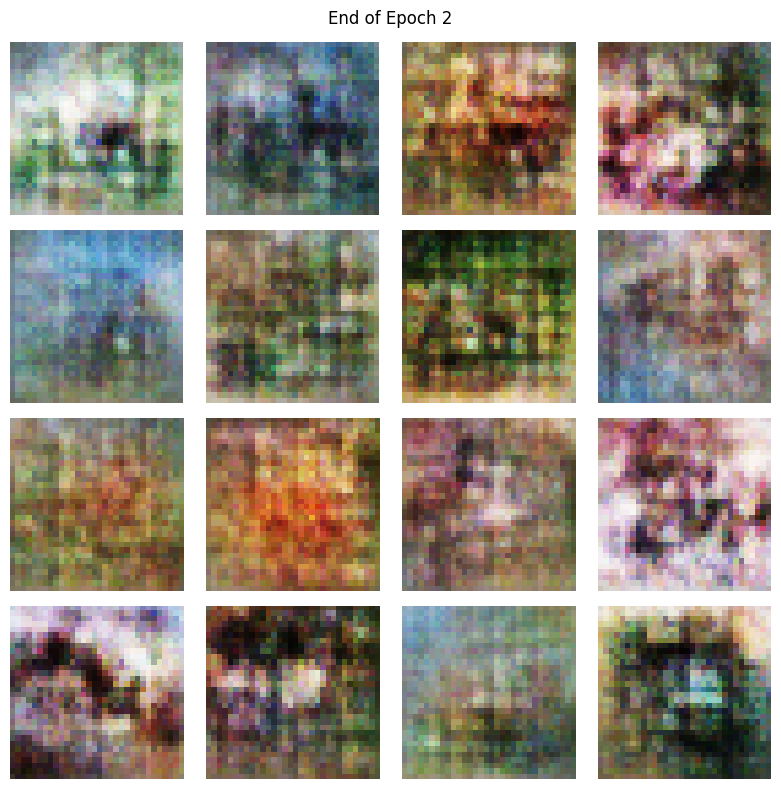


Epoch 3/5
Step 0: D=1.026, G=58.259


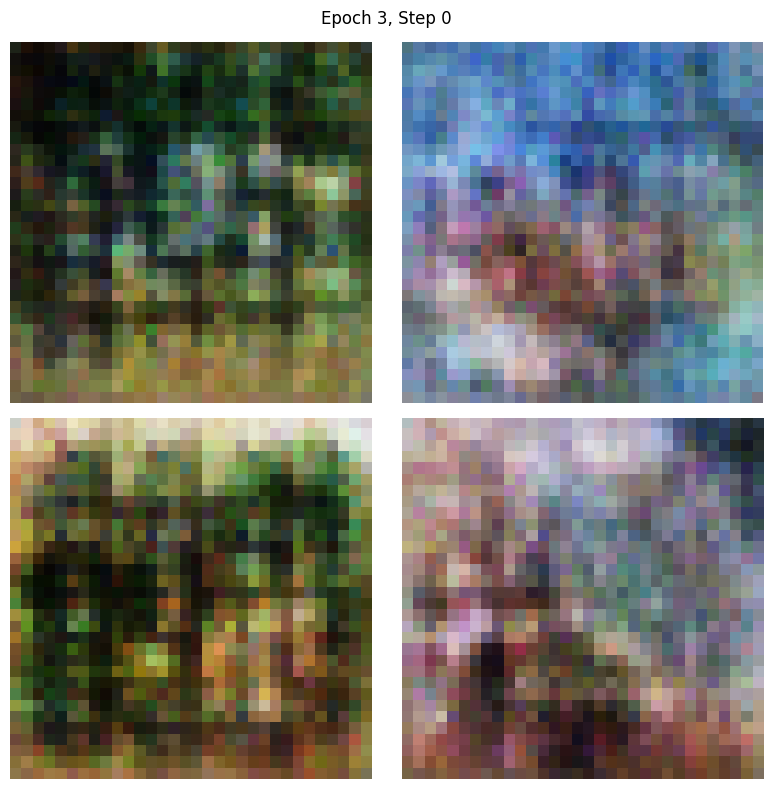

Step 100: D=0.616, G=56.447
Step 200: D=0.304, G=55.689
Step 300: D=1.082, G=55.618
Step 400: D=0.616, G=54.024
Step 500: D=0.302, G=57.767


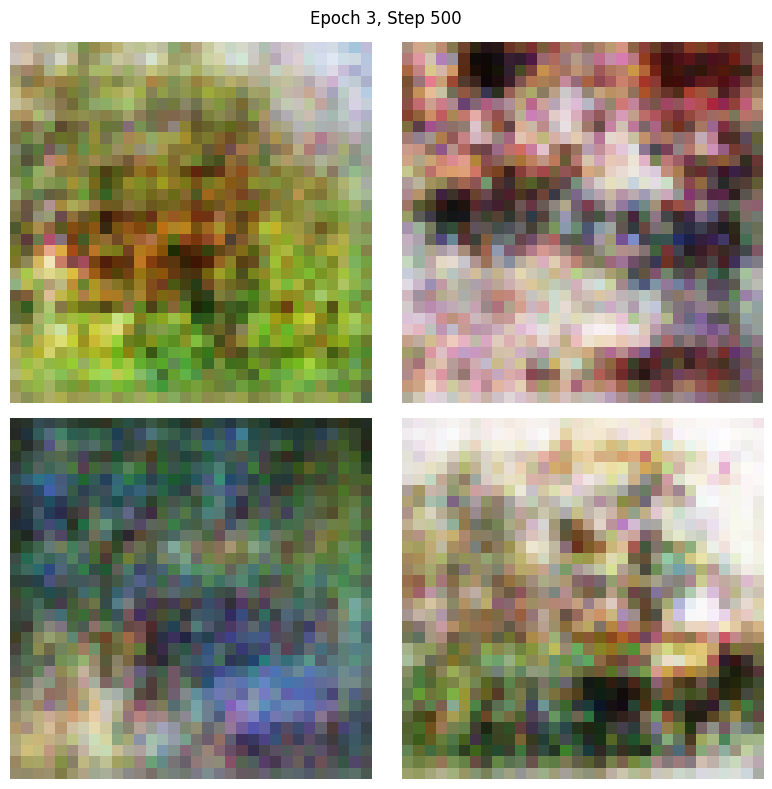

Step 600: D=0.362, G=56.406
Step 700: D=0.305, G=59.035


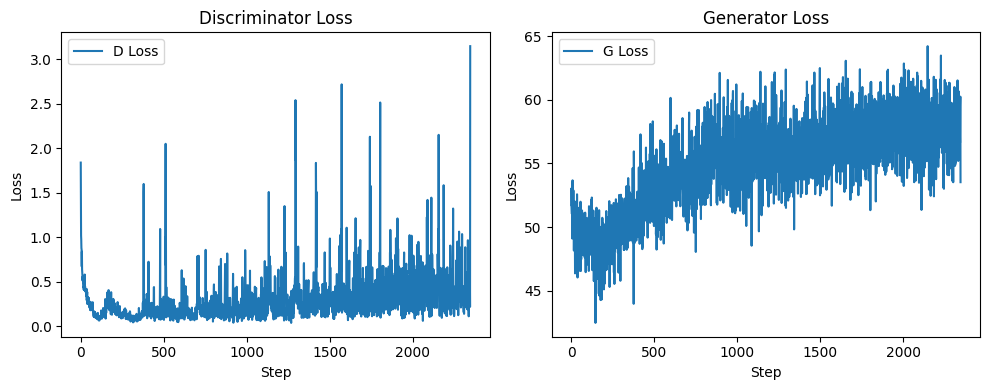

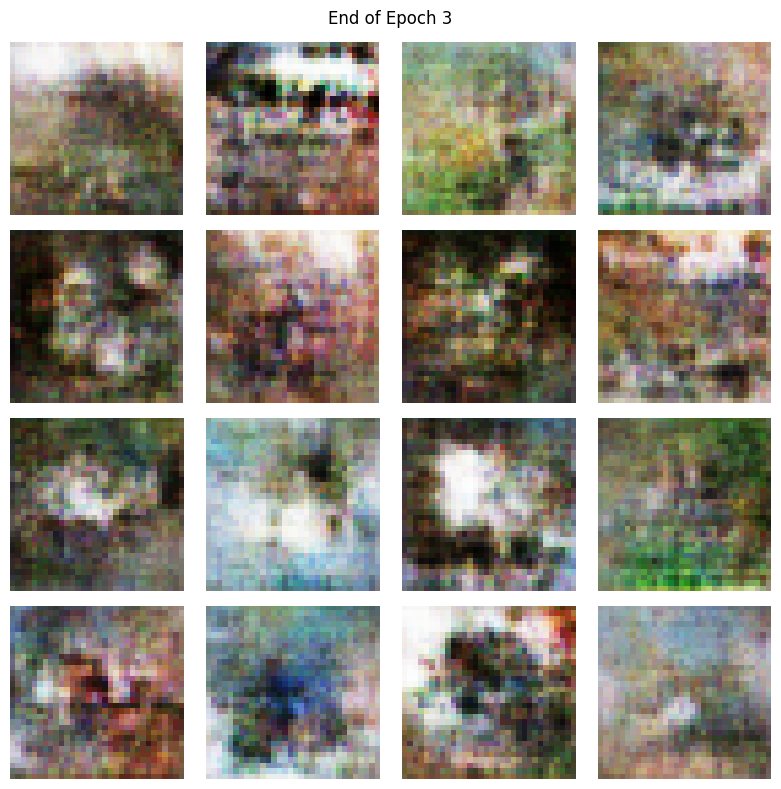


Epoch 4/5
Step 0: D=2.216, G=62.392


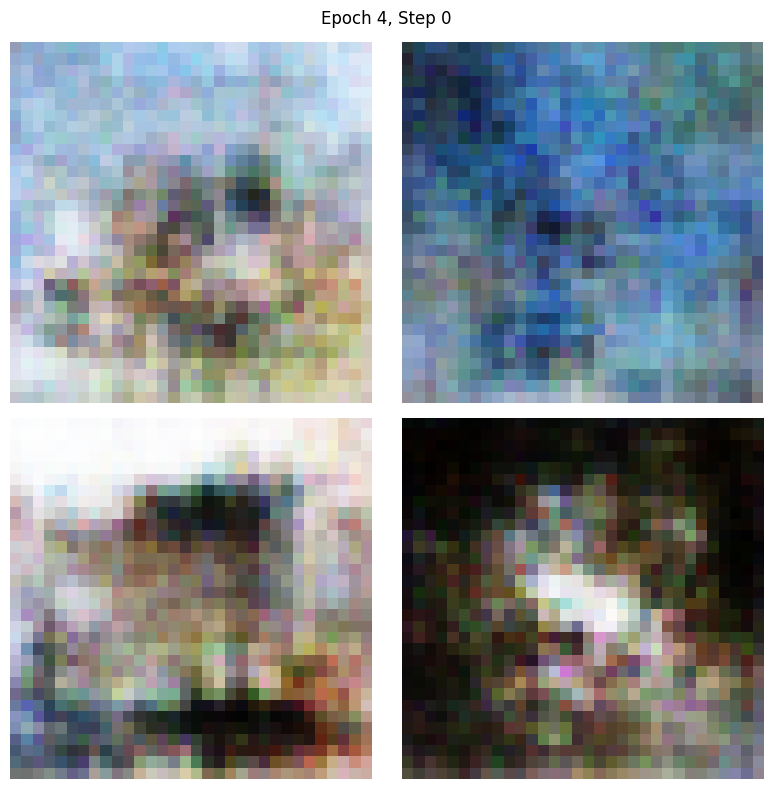

Step 100: D=0.739, G=57.132
Step 200: D=0.179, G=57.351
Step 300: D=0.548, G=62.070
Step 400: D=0.845, G=62.725
Step 500: D=0.273, G=58.193


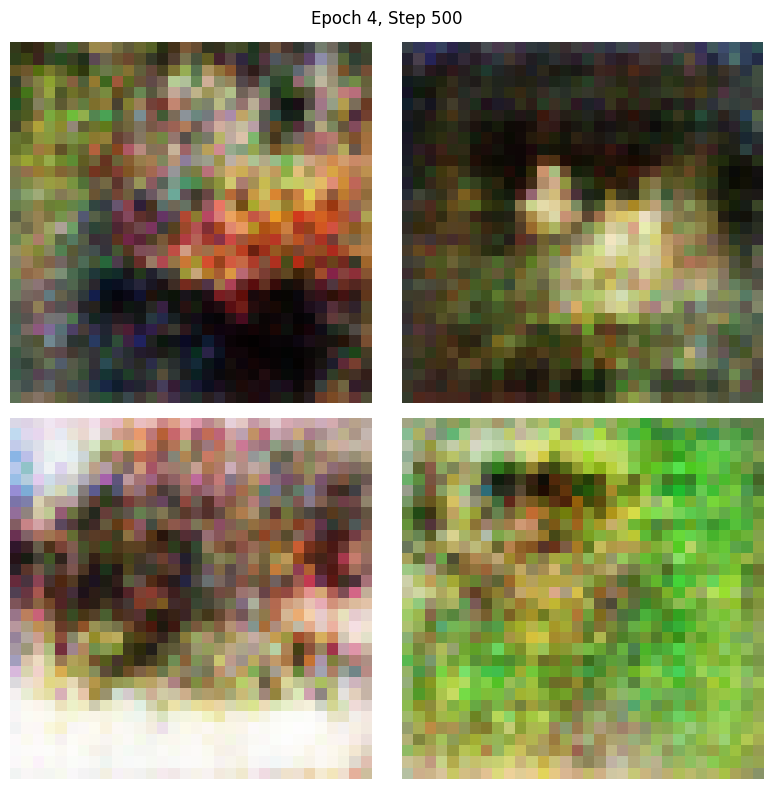

Step 600: D=0.236, G=56.582
Step 700: D=0.332, G=58.288


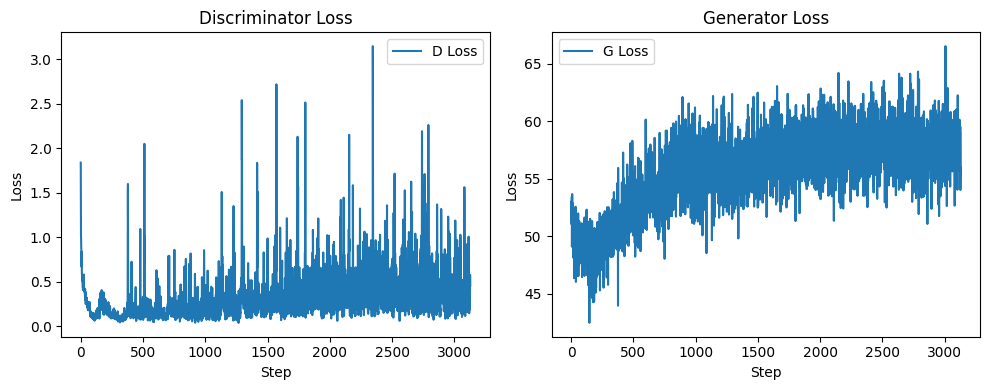

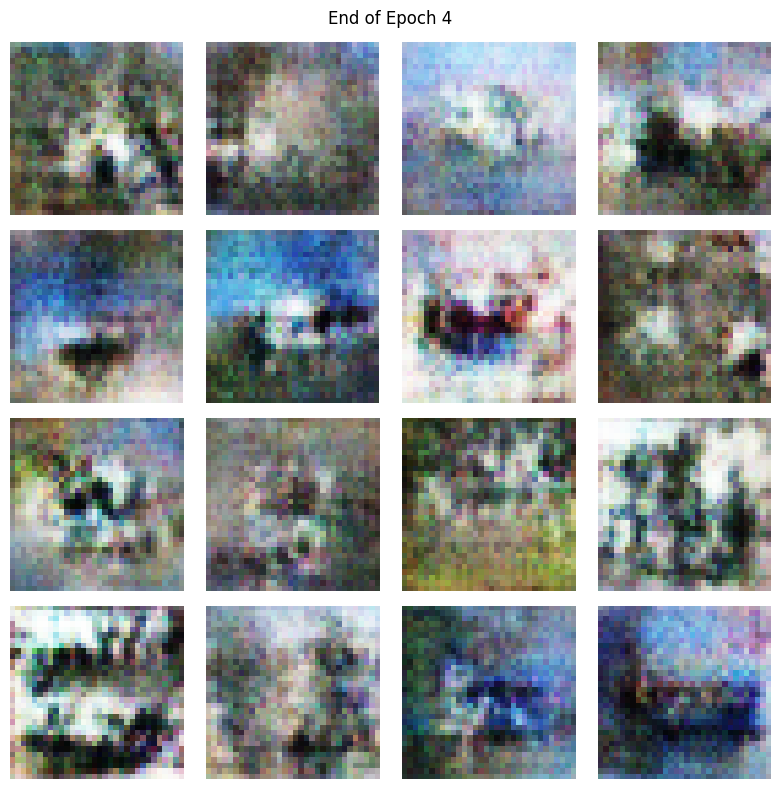


Epoch 5/5
Step 0: D=0.267, G=59.719


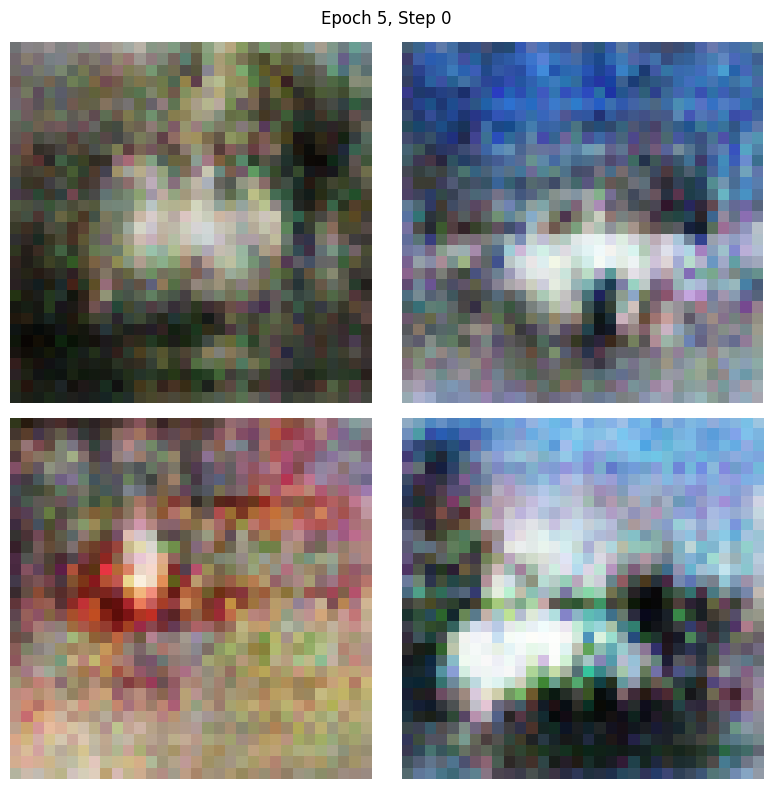

Step 100: D=0.443, G=59.588
Step 200: D=0.093, G=58.281
Step 300: D=0.256, G=59.004
Step 400: D=0.290, G=59.981
Step 500: D=0.903, G=54.059


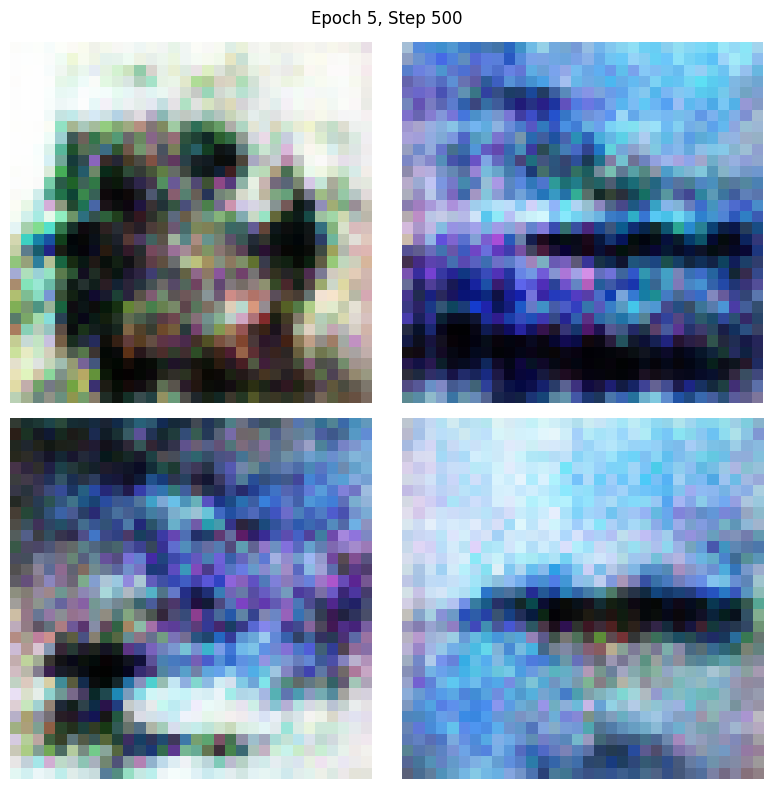

Step 600: D=0.325, G=56.531
Step 700: D=0.413, G=59.638


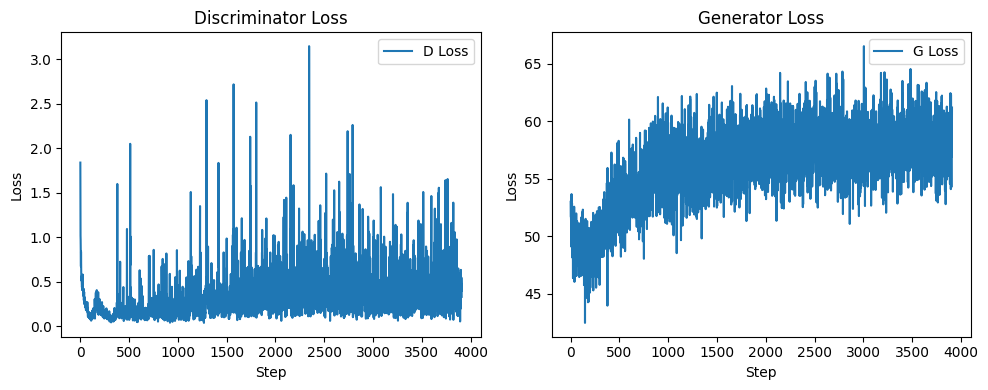

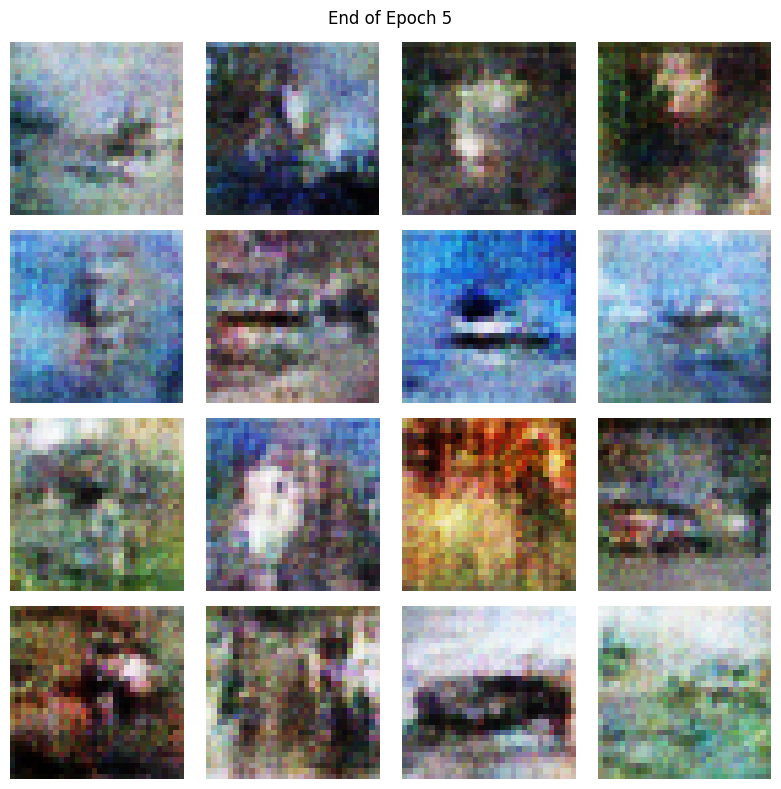

In [14]:
# Використання підготовленого датасету
trainer = Trainer(generator, discriminator)

# Запуск навчання
trainer.train(train_dataset, epochs=5, print_interval=100)

# Оцінка
for real_images, _ in dataset.take(1):
    noise = tf.random.normal([len(real_images), 1, 1, trainer.z_dim])
    restored_images = trainer.generator(noise, training=False)
    trainer.evaluate_images(real_images, restored_images)